In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Procesamos los txt
data = []
pop = []

file = open("all_pops.txt")

for line in file:
    
    #si la linea está vacia la saltamos
    if len(line.strip()) == 0:
        continue

    #si no la procesamos
    values = line.strip().split()
    
    #Encontramos una nueva generación
    if values[0] == "Gen":

        if len(pop) > 0:
            nparr = np.array(pop)
            data.append(np.min(nparr))

        pop = []
    
    elif values[0] == "Individuo":
        continue
    
    #Si no es ninguno de los casos anteriores entonces son los datos de un individuo
    else:
        f_value = int(values[-1].split("=")[-1])
        pop.append(f_value)



file = open("params.txt")
#Lets process params as well
instance = ""
all_text = ""
flg = True


for line in file:

    if line.strip() == "PARAMS:":
        continue

    if flg:
        instance += line.split('/')[-1]

        flg=False
    else:
        all_text += line


In [15]:
#print(data)
print(all_text)

Seed: 11
Max_gen: 5000
Popsize: 20
Cross prob: 0.8
Mut prob: 0.2
N heuristics: 3
Elites: 1



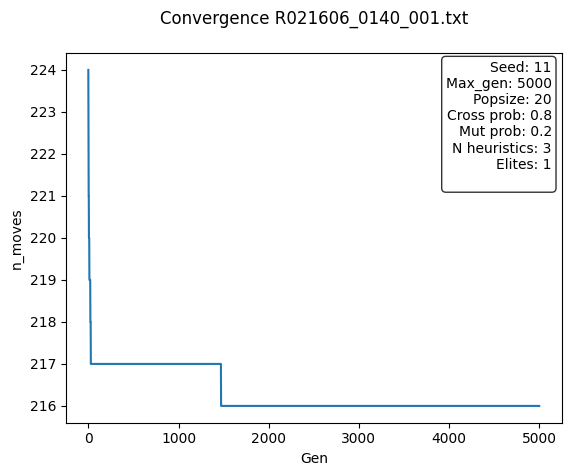

In [16]:
fig, ax = plt.subplots()
ax.plot(data)
ax.set_title("Convergence " + instance)
ax.set_xlabel("Gen")
ax.set_ylabel("n_moves")
ax.text(0.98, 0.98, all_text, transform=ax.transAxes, ha='right', va='top', fontsize=10,  bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()